<img src="img/Marca-ITBA-Color-ALTA.png" width="250">

# Programación para el Análisis de Datos

## Clase 5 - Visualización de datos con Seaborn

Seaborn es una librería para hacer visualizaciones que se basa en matplotlib, pero tiene una serie de funcionalidades orientadas a la estadística descriptiva de los datos. Veremos a continuación algunos de los objetos y métodos principales. Pueden ahondar más en la documentación oficial:

https://seaborn.pydata.org/

Los tipos de gráfico principales se pueden agrupar en

#### Relational plots

Sirven para graficar la relación entre variables típicamente continuas.


#### Distribution plots

Los usamos para visualizar distribuciones típicamente univariadas.


#### Categorical plots

Nos sirven para ver el número de observaciones de cada categoría de una variable categórica, o para ver distribuciones de una variable continua condicionada por categorías.

#### Regression plots

Relación entre dos variables continuas. Se muestra un scatterplot junto con la recta obtenida por una regresión lineal.


#### Matrix plots

Gráficos de calor para mostrar datos numéricos ordenados en una matriz. Por ejemplo correlaciones, o una función de dos variables. 

#### Pair grids

Arreglo de gráficos en una grilla en donde las filas y columnas indican variables o niveles de variables categóricas.



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')


#### Dataset

La librería provee algunos datasets que podemos listar e importar con las funciones

* sns.get_dataset_names()
* sns.load_dataset('name')

Usaremos el dataset de "mpg" (miles per galon) que habla sobre el rendimiento de diferentes modelos de autos.

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
data_mpg = sns.load_dataset('mpg')
data_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
# Definimos una nueva variable categórica con la década del modelo.
data_mpg['decade'] = np.floor(data_mpg['model_year']/10)*10
data_mpg['decade'] = data_mpg['decade'].astype(int).astype(str)

In [7]:
data_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,decade
229,16.0,8,400.0,180.0,4220,11.1,77,usa,pontiac grand prix lj,70
62,13.0,8,350.0,165.0,4274,12.0,72,usa,chevrolet impala,70
105,13.0,8,360.0,170.0,4654,13.0,73,usa,plymouth custom suburb,70
362,24.2,6,146.0,120.0,2930,13.8,81,japan,datsun 810 maxima,80
373,24.0,4,140.0,92.0,2865,16.4,82,usa,ford fairmont futura,80


Algunas funciones de las que veremos más abajo ignoran los datos nulos, mientras que otras pueden devolver un error. Por simplicidad vamos a remover los nulos desde ahora.

In [8]:
data_mpg.dropna(inplace=True)

In [9]:
data_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Aspecto de los gráficos

Con el método set_context() podemos definir el aspecto general de los gráficos que vamos a hacer. 



In [16]:
sns.set_context("notebook", font_scale=1.2)
# sns.set_context("talk")
# sns.set_context("paper")

## Relational plots


### Scatterplot

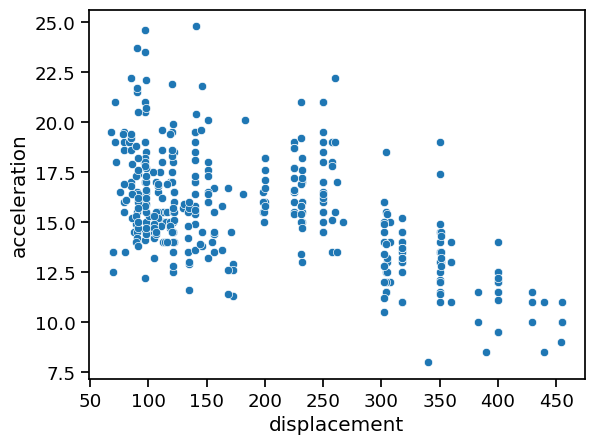

In [17]:
g = sns.scatterplot(x='displacement', y='acceleration', data=data_mpg);

In [18]:
type(g)

matplotlib.axes._axes.Axes

### Axes properties

Vemos que el objeto creado es de tipo Axes de Matplotlib, es decir que podemos modificar sus atributos como vimos en la notebook de Matplotlib. Por ejemplo:

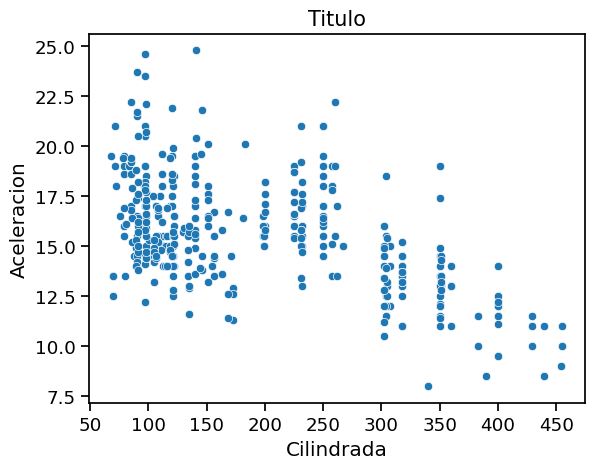

In [19]:
g = sns.scatterplot(x='displacement', y='acceleration', data=data_mpg);
g.set_xlabel('Cilindrada');
g.set_ylabel('Aceleracion');
g.set_title('Titulo', fontsize=15);

Si quisiéramos cambiar el tamaño del plot o ubicarlo dentro de una figura en particular como un subplot lo hacemos pasando el axes en donde queremos plotear usando el argumento ax.


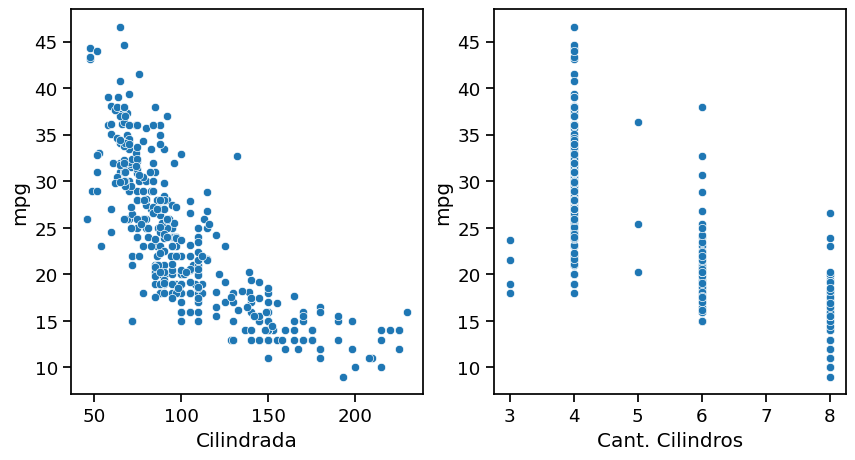

In [20]:
Fig, Axes = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(x='horsepower', y='mpg', data=data_mpg, ax=Axes[0])
sns.scatterplot(x='cylinders', y='mpg', data=data_mpg, ax=Axes[1])
Axes[0].set_xlabel('Cilindrada')
Axes[1].set_xlabel('Cant. Cilindros');

In [ ]:
Axes

### hue, style, size

Para distinguir datos de acuerdo a una o más variables categóricas, podemos usar los argumentos `hue`, `style` y `size`. `Hue` define un color, `style` un marcador y `size` un tamaño para cada categoría. De esta manera podemos codificar hasta tres variables categóricas. Si tenemos menos, no está mal usar más de un recurso aunque sea redundante, para hacer más accesible la lectura del gráfico.

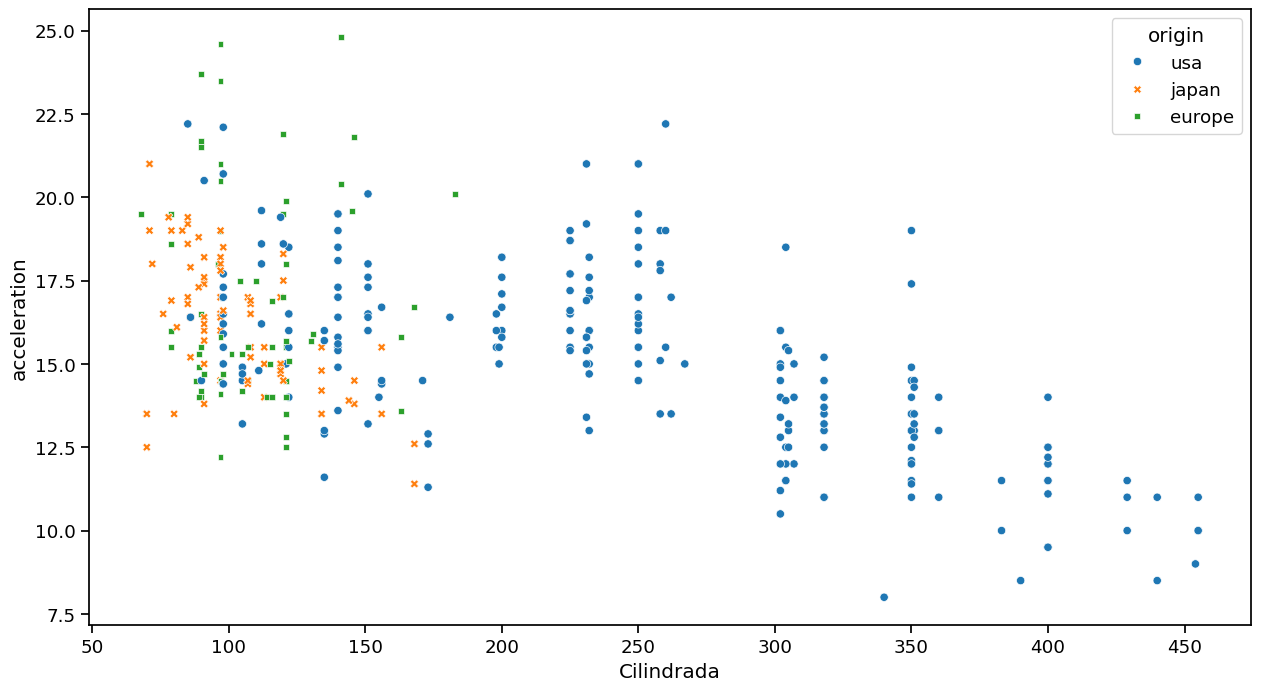

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='displacement', y='acceleration', data=data_mpg, hue='origin', style='origin')
plt.xlabel('Cilindrada');

### Lineplot

Grafica la relación entre dos variables como una linea. El argumento "ci" sirve para dar intervalos de confianza al valor de "y" dado el valor de "x". Un valor posible para "ci" es "sd", en donde toma la desviación estandar de los valores de "y" para cada valor de "x". Si pasamos un valor numérico, por ejemplo ci=95, grafica los intervalos de confianza al 95%. Esto lo hace siguiendo un procedimiento no paramétrico conocido como bootstrapping, que consiste en generar réplicas del dataset sampleando observaciones con reposición muchas veces (el argumento n_boot controla el numero de veces) y definiendo las bandas al 95% como el intervalo dentro del cual se observó "y" en el 95% de las réplicas.

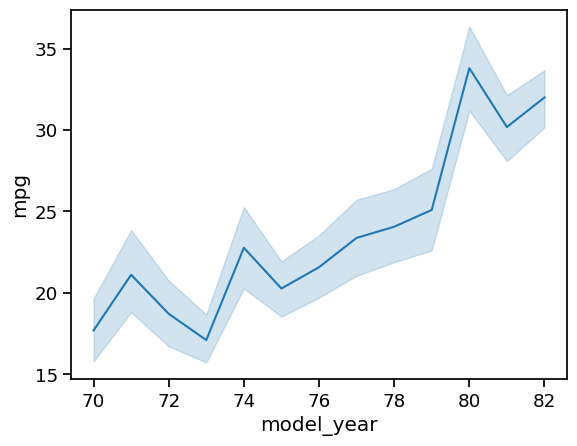

In [22]:
data_mpg.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.lineplot(x='model_year', y='mpg', data=data_mpg, errorbar=('ci', 95));

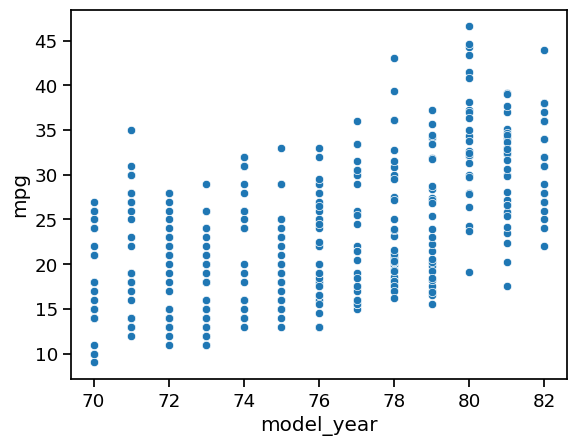

In [23]:
sns.scatterplot(x='model_year', y='mpg', data=data_mpg);

### Relplot

A diferencia de los `lineplots` y `scatterpolots` que crean objetos a nivel Axes, `relplot` genera objetos a nivel Figure. Es decir que interactúa con matplotlib a un nivel más alto, mediante objetos de seaborn como Facetgrid. Una consecuencia de esto es que podremos hacer una figura compuesta por varios axes mediante la API de seaborn.

Por ejemplo:

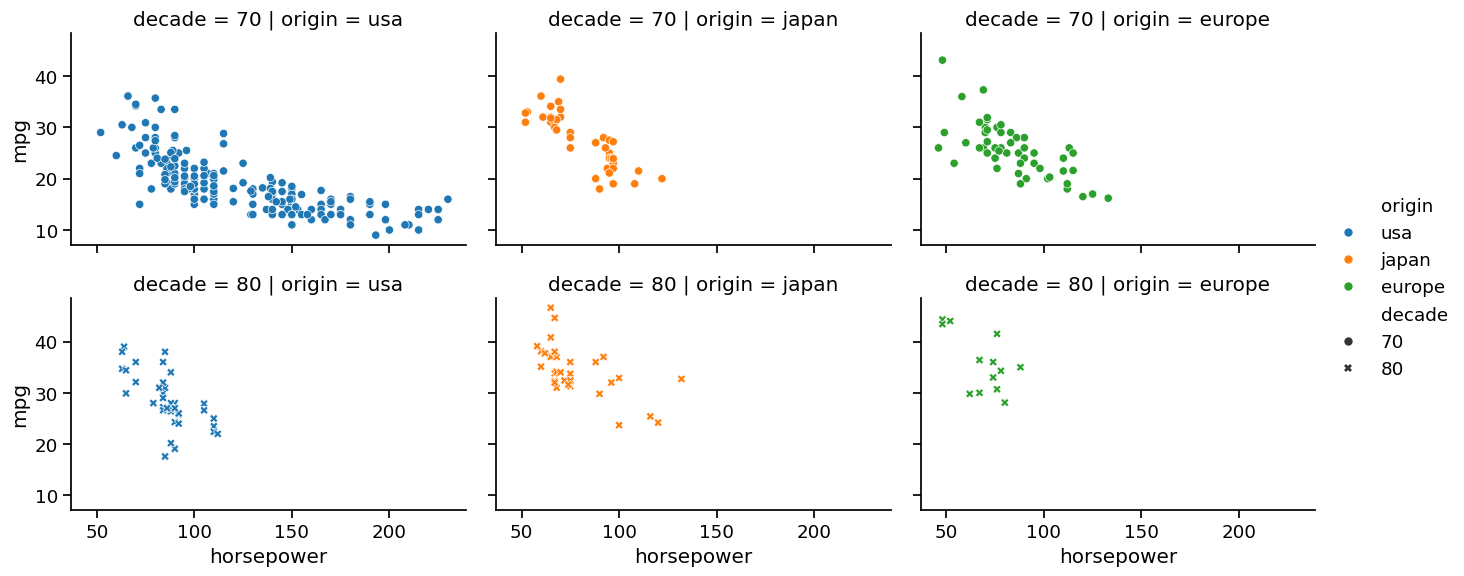

In [24]:
f = sns.relplot(x='horsepower',\
                y='mpg',\
                data=data_mpg,\
                col='origin',\
                row='decade',\
                hue='origin',\
                style='decade',\
                height=3,\
                aspect=1.5)


In [25]:
type(f)

seaborn.axisgrid.FacetGrid

## Distributions

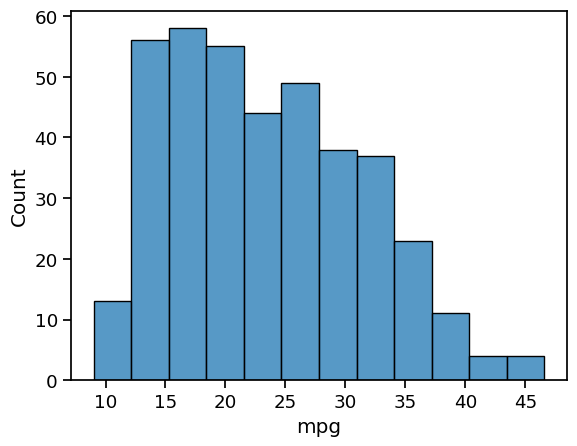

In [26]:
# Histograma
sns.histplot(data_mpg['mpg'], kde=False, bins='auto');

### kernel density estimate

El argumento kernel density estimate (kde) sirve para obtener una estimación de una función de densidad de probabilidades. Esto se logra haciendo una convolución del histograma con un nucleo (kernel) típicamente gaussiano.

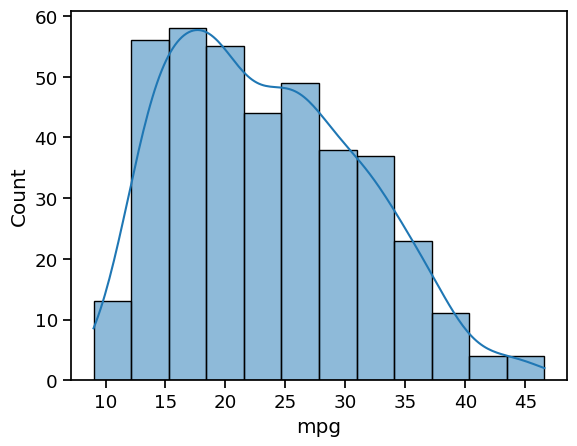

In [27]:
# Histograma con kde
sns.histplot(data_mpg['mpg'], kde=True);

Podemos graficar solo el kde usando la función kdeplot. Esto puede ser útil para comparar varios histogramas. En este caso la función no cuenta con el argumento hue, así que lo hacemos a mano.

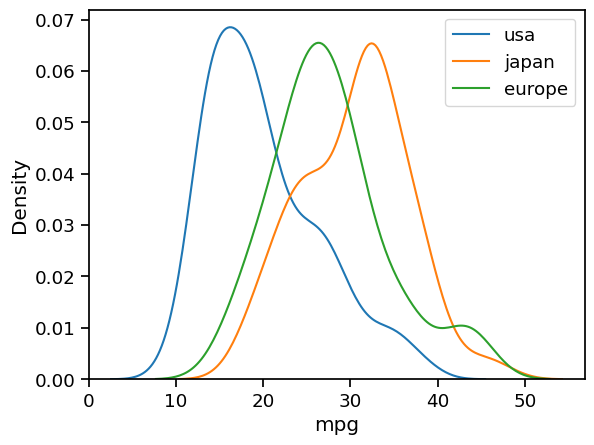

In [28]:
mask_usa = data_mpg['origin']=='usa'
mask_japan = data_mpg['origin']=='japan'
mask_europe = data_mpg['origin']=='europe'

sns.kdeplot(data_mpg.loc[mask_usa,'mpg'], label='usa');
sns.kdeplot(data_mpg.loc[mask_japan,'mpg'], label='japan');
sns.kdeplot(data_mpg.loc[mask_europe,'mpg'], label='europe');

plt.xlabel('mpg')
plt.legend();

### kde bivariada - curvas de nivel

Podemos graficar las curvas de nivel para la densidad de probabilidad estimada de los datos bivariados.

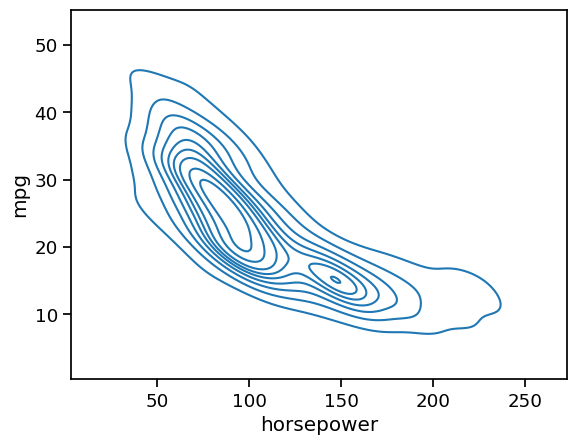

In [29]:
sns.kdeplot(x=data_mpg['horsepower'] ,y=data_mpg['mpg']);

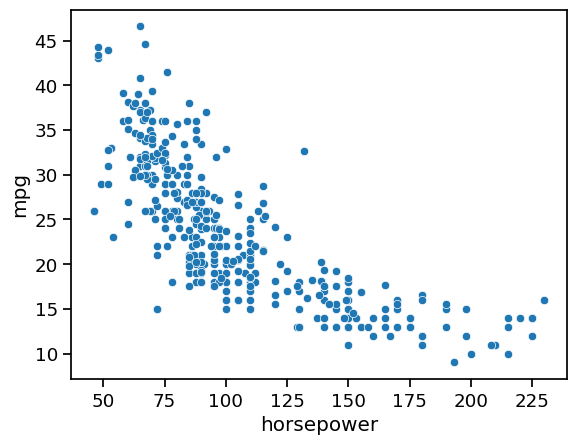

In [30]:
sns.scatterplot(x=data_mpg['horsepower'] ,y=data_mpg['mpg']);

## Categorical plots


* `catplot`: Figure-level interface for drawing categorical plots onto a FacetGrid.
* `stripplot`: Draw a scatterplot where one variable is categorical.
* `swarmplot`: Draw a categorical scatterplot with non-overlapping points.
* `boxplot`: Draw a box plot to show distributions with respect to categories.
* `violinplot`: Draw a combination of boxplot and kernel density estimate.
* `pointplot`: Show point estimates and confidence intervals using scatter plot glyphs.
* `barplot`: Show point estimates and confidence intervals as rectangular bars.
* `countplot`: Show the counts of observations in each categorical bin using bars.

Veamos con distintos gráficos la distribución de rendimientos (mpg) para cada país y separados por década.

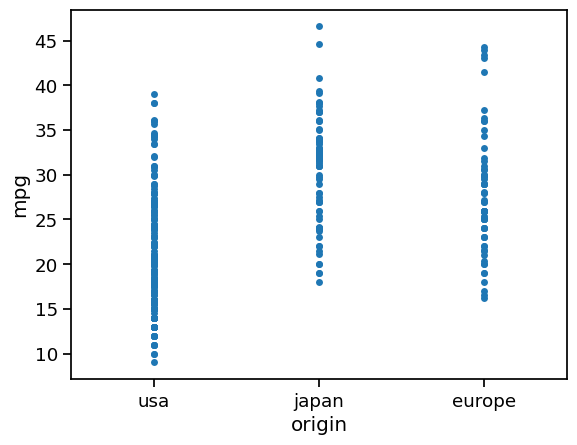

In [31]:
sns.stripplot(x='origin', y='mpg', data=data_mpg, jitter=False);

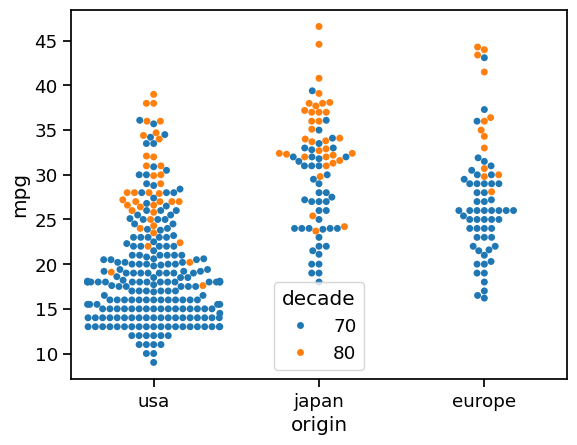

In [32]:
sns.swarmplot(x='origin',y='mpg', data=data_mpg, hue='decade');

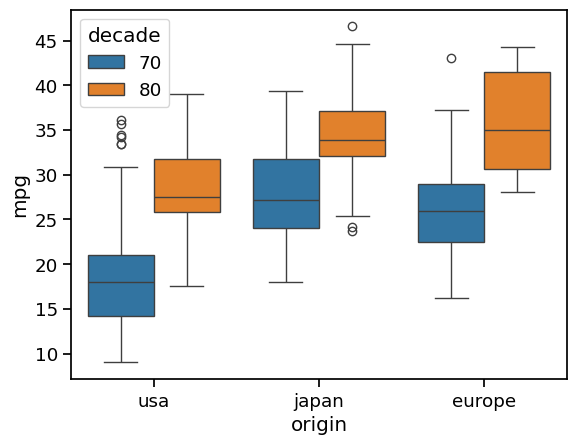

In [33]:
sns.boxplot(x='origin',y='mpg' ,data=data_mpg, hue='decade');

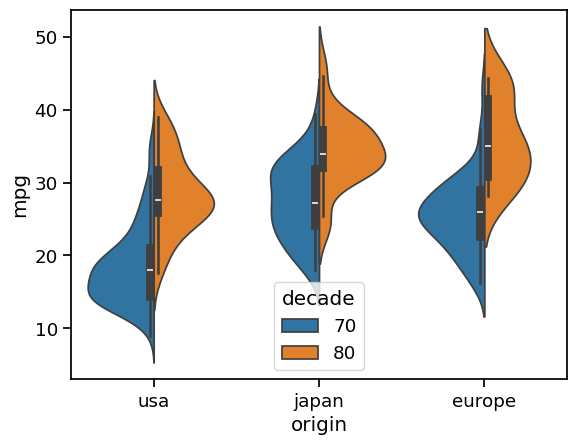

In [34]:
sns.violinplot(x='origin', y='mpg', data=data_mpg, hue='decade', split=True);

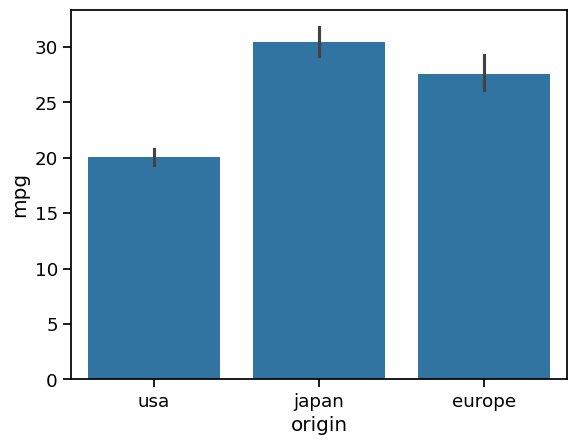

In [35]:
sns.barplot(x='origin', y='mpg', data=data_mpg, errorbar=('ci', 95)); 

Nótese cuánta menos información muestra el barplot que los anteriores. Estamos viendo solamente la media y el desvío estandar. Este tipo de gráficos tiene más sentido usarlos para mostrar por ejemplo proporciones.

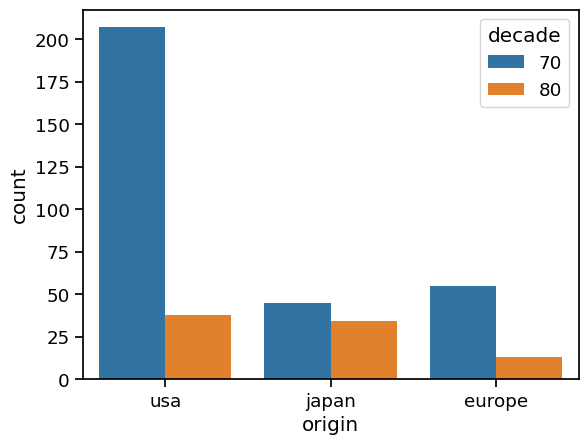

In [36]:
sns.countplot(x='origin',data=data_mpg, hue='decade');

Al igual que la función relplot para las variables relacionales, catplot opera a nivel figura para componer diferentes categorical plots.

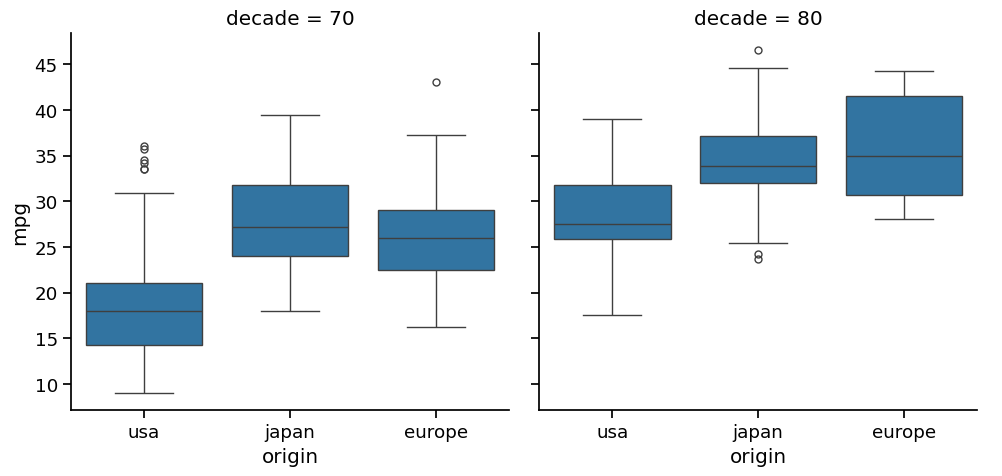

In [37]:
sns.catplot(x='origin', y='mpg', data=data_mpg, col='decade', height=5, aspect=1, kind='box');

## Regression plot

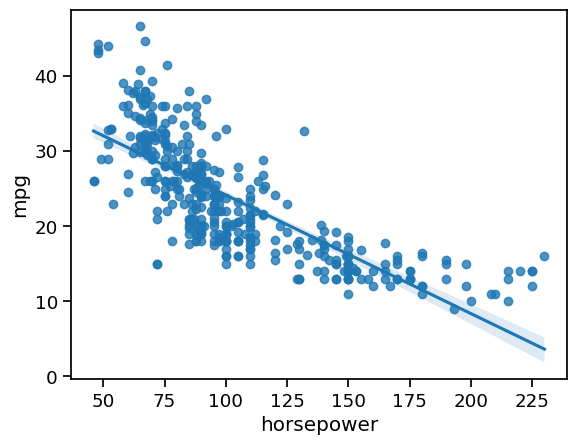

In [38]:
sns.regplot(x='horsepower', y='mpg', data=data_mpg);

Vemos la recta que mejor ajusta a los datos, aunque claramente la relación entre las variables no es lineal. Modificando el argumento `order` podemos ajustar polinomios de orden mayor a 1.

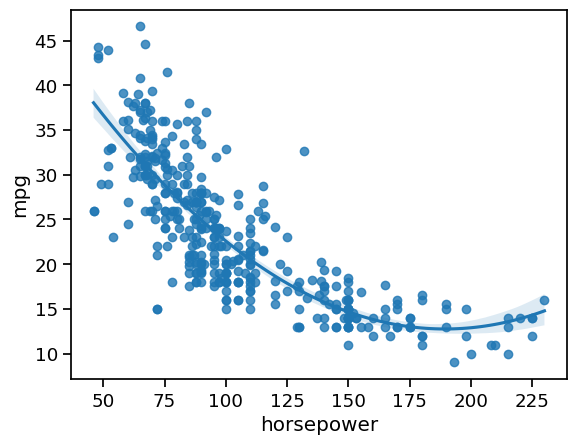

In [39]:
sns.regplot(x='horsepower',y='mpg',data=data_mpg, order=2);

El argumento lowess sirve para hacer un ajuste lineal de los datos localizado en intervalos. Esto nos permite observar relaciones no lineales entre las variables.

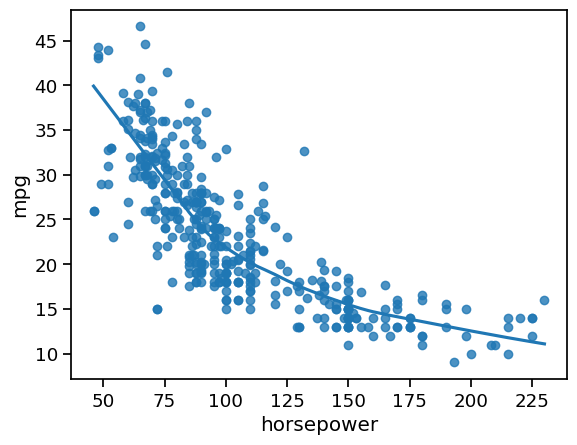

In [40]:
sns.regplot(x='horsepower',y='mpg',data=data_mpg, lowess=True);

Podemos graficar los residuos de la regresion lineal y constatar que no es un buen modelo.

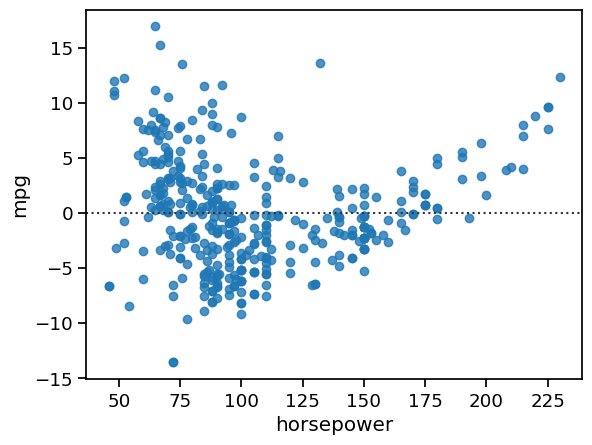

In [41]:
sns.residplot(x='horsepower',y='mpg',data=data_mpg);

Observemos los residuos del modelo cuadrático y verifiquemos que es un modelo mejor:

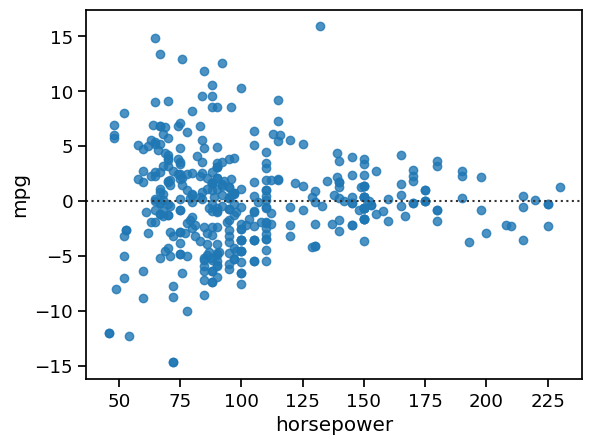

In [42]:
sns.residplot(x='horsepower', y='mpg', data=data_mpg, order=2);

## Matrix plots

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


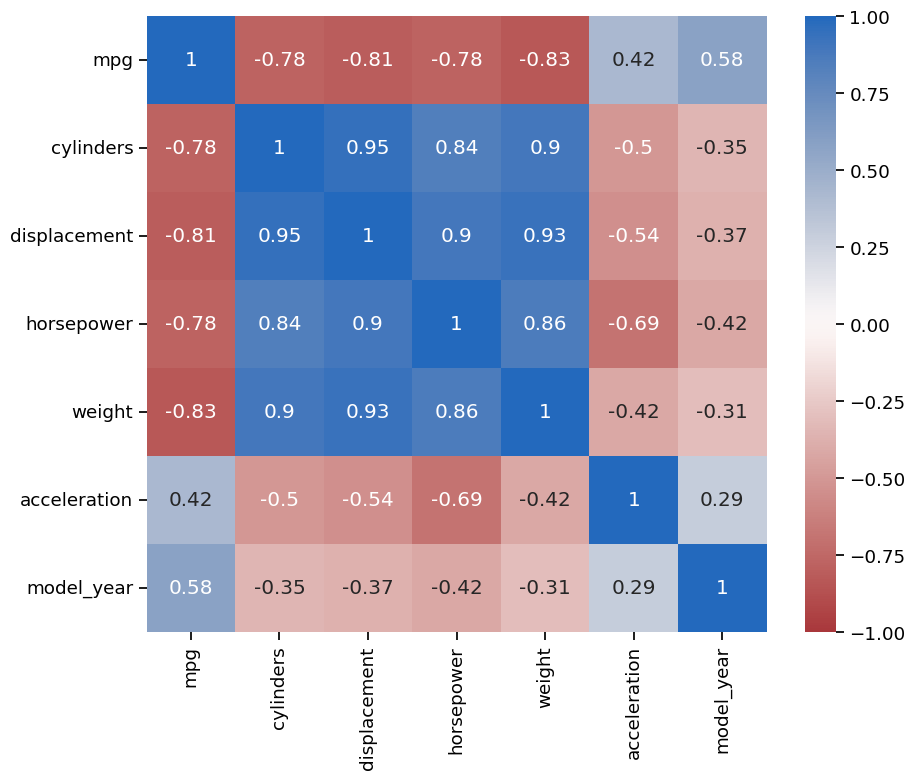

In [43]:
mat_corr = data_mpg.corr(numeric_only=True)
display(mat_corr)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(mat_corr, annot=True, ax=ax, cmap="vlag_r", center=0, vmin=-1, vmax=1);

## Pairplots

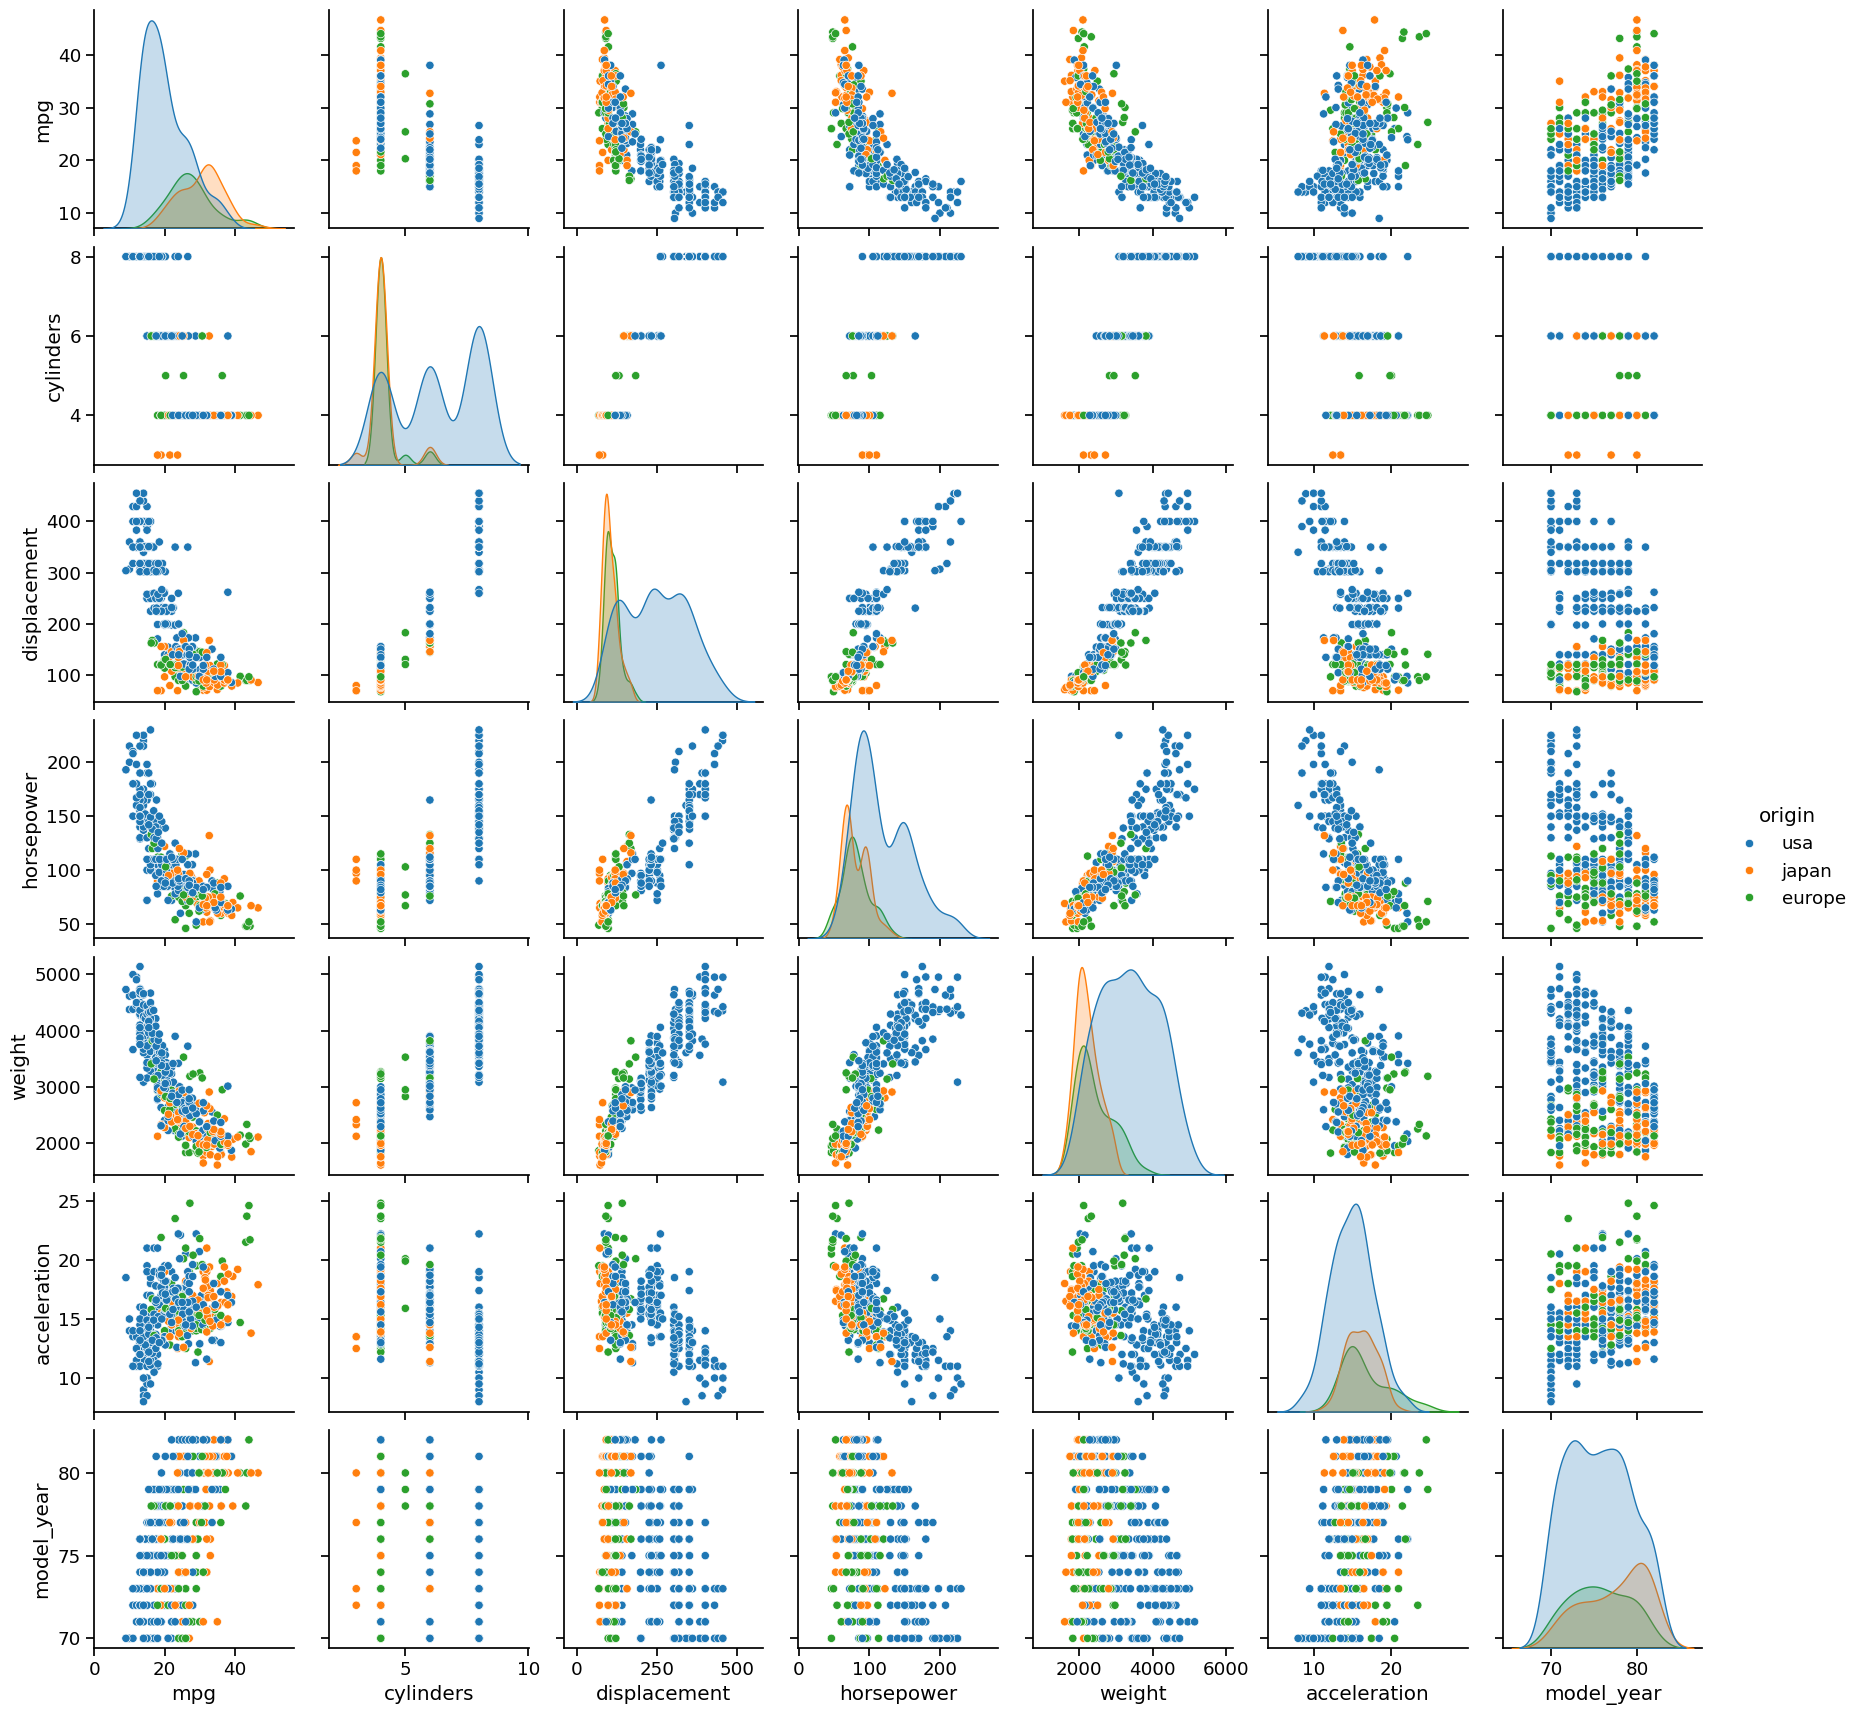

In [44]:
sns.pairplot(data_mpg.dropna(),hue='origin');

El pairplot es muy útil para explorar las relaciones entre todos los pares de variables. Sin embargo, por su estructura es redundante (los elementos fuera de la diagonal están repetidos, aunque traspuestos). Creando un objeto PairGrid podemos implementar diferentes gráficos en el triángulo superior y en el inferior.

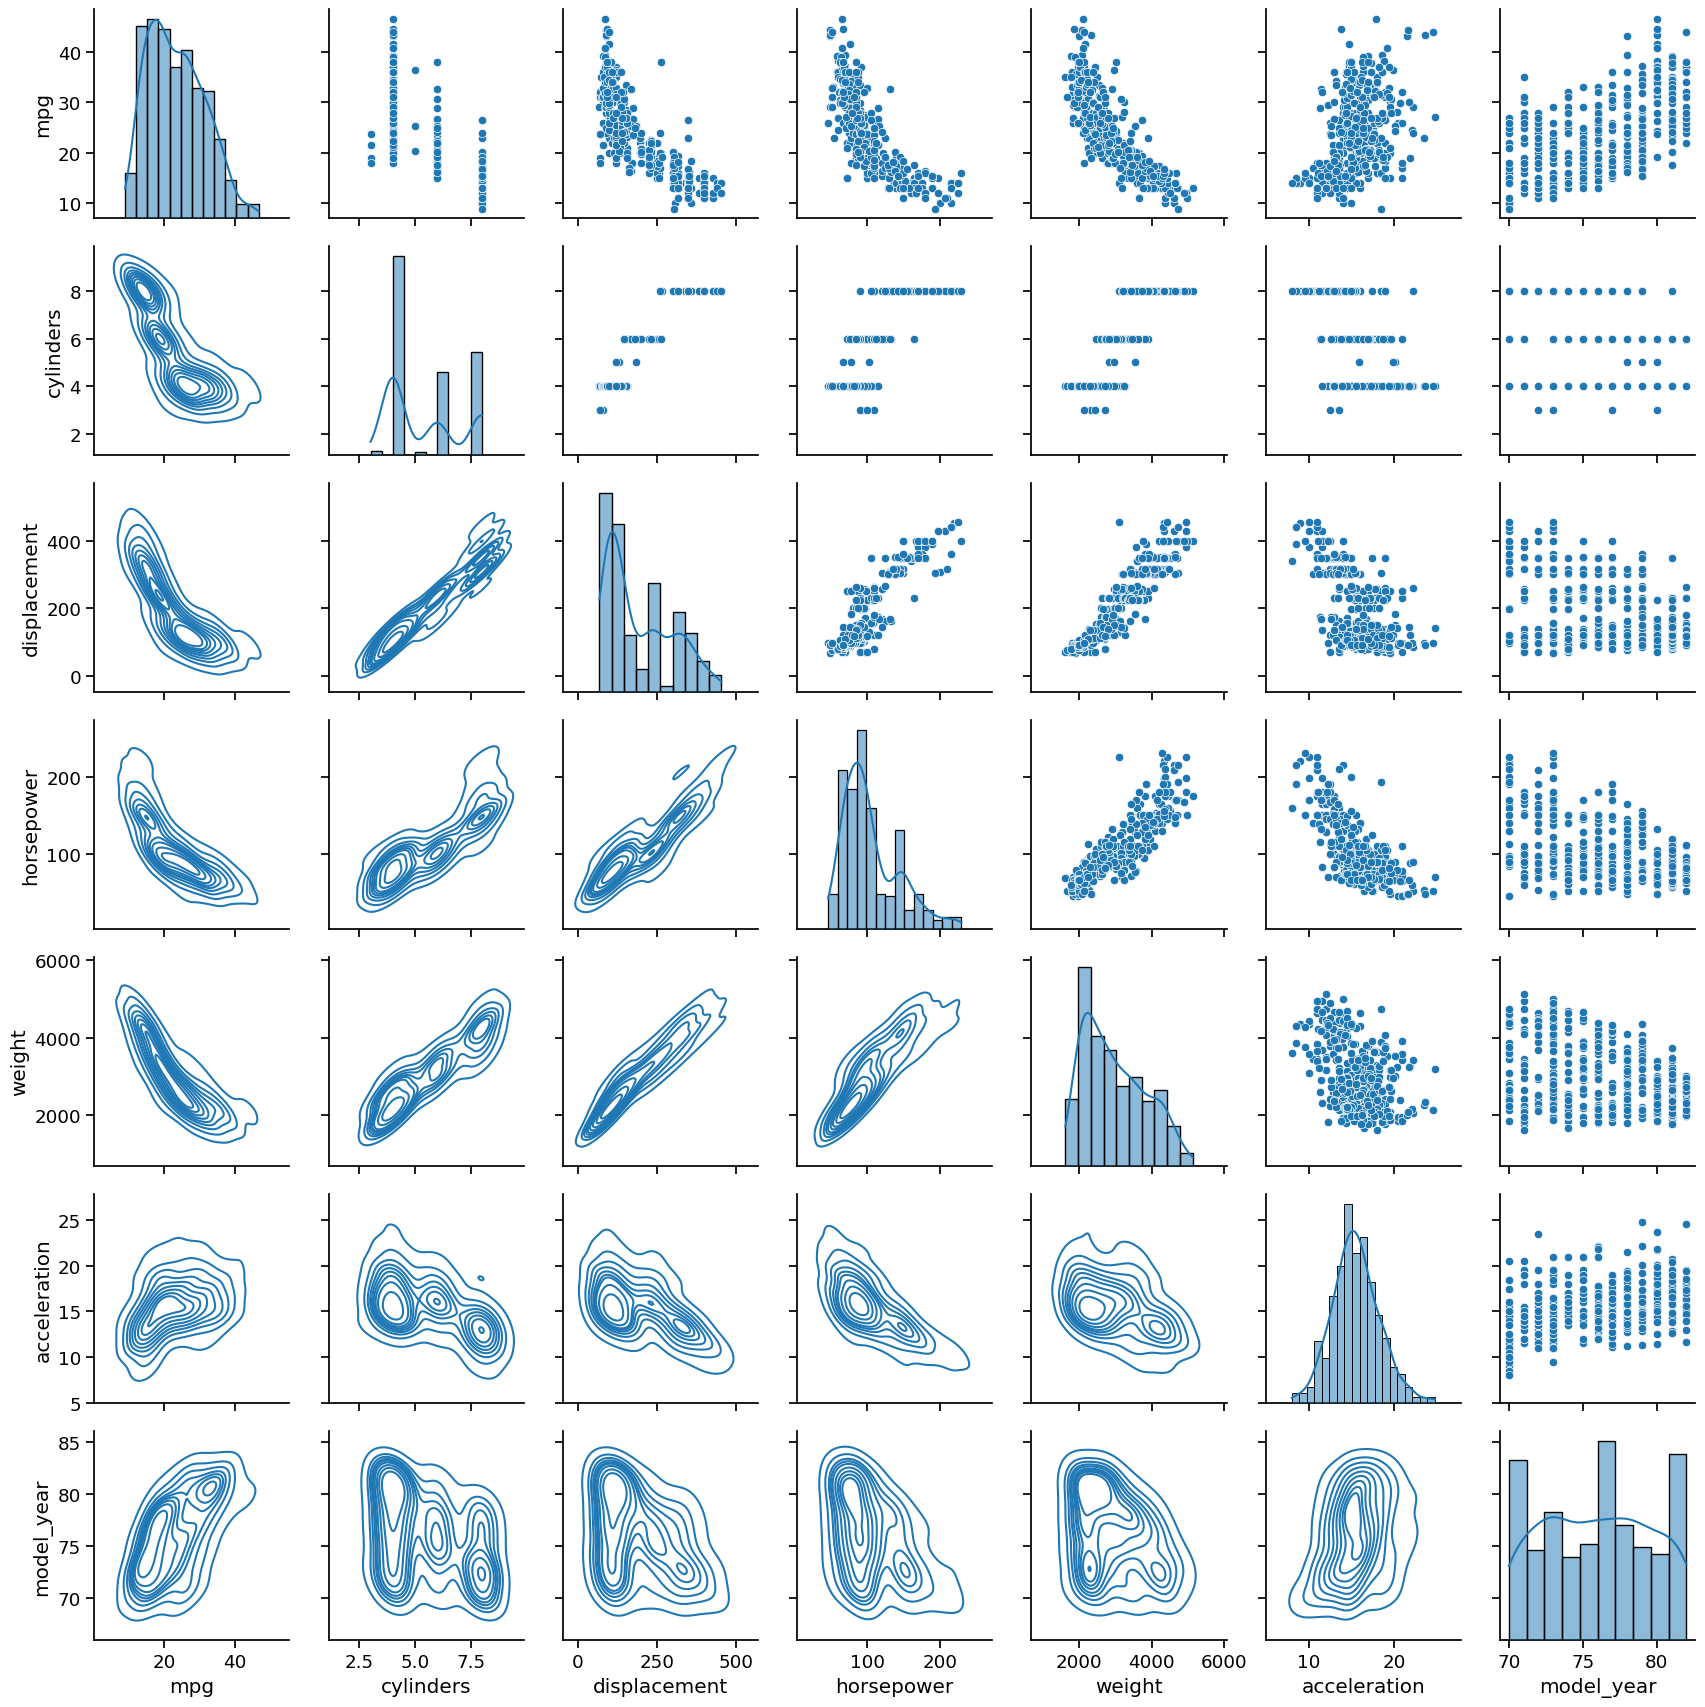

In [45]:
g = sns.PairGrid(data=data_mpg, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.kdeplot);

## Jointplot

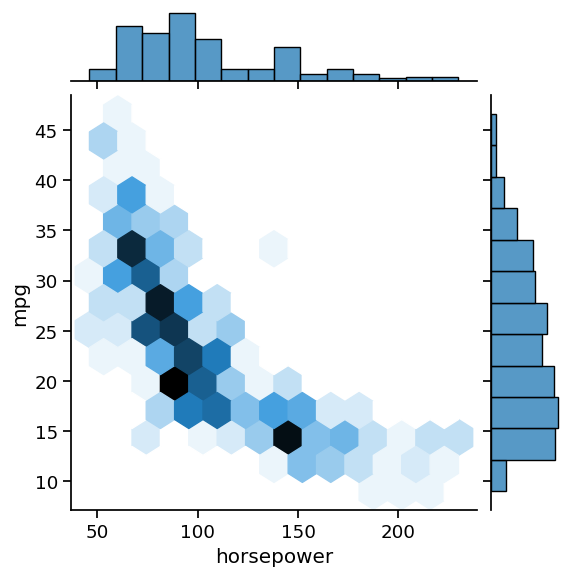

In [46]:
sns.jointplot(x='horsepower',y='mpg',data=data_mpg, kind='hex');